In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load IPL dataset (assuming the dataset is in a CSV file named 'matches.csv')
df = pd.read_csv('matches.csv')


**The best team ever with analysis, of best batsman, best bowler.**

In [29]:
best_batsman = df.groupby('winner')['player_of_match'].value_counts().idxmax()[1]
best_bowler = df.groupby('winner')['win_by_runs'].idxmax()
best_team = df.loc[best_bowler]['winner'].value_counts().idxmax()
print("Best Team Ever:", best_team)
print("Best Batsman:", best_batsman)
print("Best Bowler:", best_bowler)

Best Team Ever: Chennai Super Kings
Best Batsman: AB de Villiers
Best Bowler: winner
Chennai Super Kings            541
Deccan Chargers                299
Delhi Capitals                 725
Delhi Daredevils                 8
Gujarat Lions                  598
Kings XI Punjab                295
Kochi Tuskers Kerala           277
Kolkata Knight Riders           59
Mumbai Indians                  43
Pune Warriors                  450
Rajasthan Royals               114
Rising Pune Supergiant          32
Rising Pune Supergiants        597
Royal Challengers Bangalore    619
Sunrisers Hyderabad            706
Name: win_by_runs, dtype: int64


**The umpire name who umpired most of the matches.**

In [26]:
most_frequent_umpire = pd.concat([df['umpire1'], df['umpire2']]).value_counts().idxmax()
print("Most Frequent Umpire:", most_frequent_umpire)

Most Frequent Umpire: S Ravi


**A graph of all teams with number of matches played, win in descending order**

<Axes: xlabel='Team'>

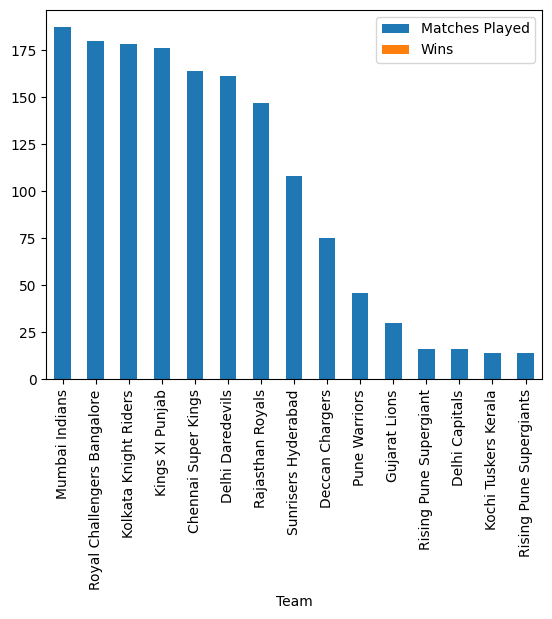

In [14]:
# Concatenate the team1 and team2 columns, and then count the number of occurrences of each team name.
teams_info = pd.concat([df['team1'], df['team2']]).value_counts().reset_index()

# Rename the columns.
teams_info.columns = ['Team', 'Matches Played']

# Add a column for the number of wins.
teams_info['Wins'] = df['winner'].value_counts().reindex(teams_info['Team']).fillna(0).astype(int)

# Sort the teams by the number of wins, in descending order.
teams_info = teams_info.sort_values(by='Wins', ascending=False)

# Plot the number of wins and matches played for each team.
teams_info.plot(x='Team', kind='bar', stacked=True)

**Players with top 6's scores and 4's scores**

In [36]:
top_six_scorers = df.nlargest(1, 'win_by_runs')['winner'].values
top_four_scorers = df.nlargest(1, 'win_by_wickets')['winner'].values
print("Players with Top 6's Score:", top_six_scorers)
print("Players with Top 4's Score:", top_four_scorers)

Players with Top 6's Score: ['Mumbai Indians']
Players with Top 4's Score: ['Kolkata Knight Riders']


**Orange cap and Purple cap holders in each year**

In [28]:
orange_cap = df.loc[df.groupby('season')['win_by_runs'].idxmax()][['season', 'winner', 'win_by_runs']]
purple_cap = df.loc[df.groupby('season')['win_by_wickets'].idxmax()][['season', 'player_of_match', 'win_by_wickets']]
print("Orange Cap Holders:\n", orange_cap)
print("Purple Cap Holders:\n", purple_cap)

Orange Cap Holders:
      season                       winner  win_by_runs
59     2008        Kolkata Knight Riders          140
121    2009          Chennai Super Kings           92
182    2010               Mumbai Indians           98
295    2011              Kings XI Punjab          111
379    2012          Chennai Super Kings           86
410    2013  Royal Challengers Bangalore          130
464    2014          Chennai Super Kings           93
556    2015  Royal Challengers Bangalore          138
619    2016  Royal Challengers Bangalore          144
43     2017               Mumbai Indians          146
676    2018               Mumbai Indians          102
706    2019          Sunrisers Hyderabad          118
Purple Cap Holders:
      season player_of_match  win_by_wickets
71     2008    AC Gilchrist              10
119    2009      DL Vettori              10
183    2010       JH Kallis              10
298    2011       SR Watson              10
376    2012        DR Smith         